In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Cargar el archivo .csv sin índice
data = pd.read_csv('listings_limpio_Sydney.csv')

In [3]:
#Información del archivo
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    16228 non-null  int64  
 1   id                                            16228 non-null  int64  
 2   listing_url                                   16228 non-null  object 
 3   host_id                                       16228 non-null  int64  
 4   host_name                                     16228 non-null  object 
 5   host_location                                 16228 non-null  object 
 6   host_response_time                            16228 non-null  object 
 7   host_response_rate                            16228 non-null  object 
 8   host_acceptance_rate                          16228 non-null  object 
 9   host_is_superhost                             16228 non-null 

In [4]:
# Separar datos cualitativos y cuantitativos
columnas_cuantitativas = data.select_dtypes(include=['number']).columns
columnas_cualitativas = data.select_dtypes(exclude=['number']).columns

cuantitativas = data[columnas_cuantitativas]
cualitativas = data[columnas_cualitativas]

<Figure size 1500x800 with 0 Axes>

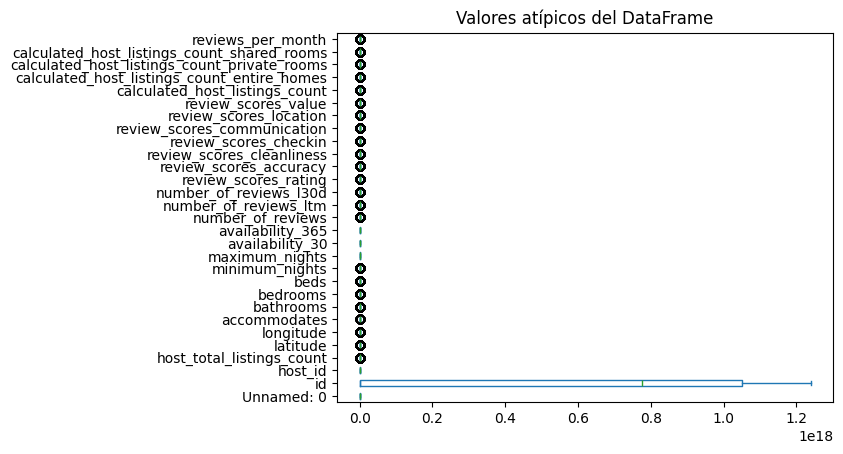

In [5]:
# Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores atípicos del DataFrame")
plt.show()  # Dibujamos el diagrama

In [6]:
# Procedimiento desviación estándar para eliminar outliers en dataframe
y = cuantitativas.select_dtypes(include=['number'])
Limite_Superior = y.mean() + 3 * y.std()
Limite_Inferior = y.mean() - 3 * y.std()

print("Límite superior permitido:\n", Limite_Superior)
print("Límite inferior permitido:\n", Limite_Inferior)

Límite superior permitido:
 Unnamed: 0                                      2.216779e+04
id                                              2.087184e+18
host_id                                         7.244530e+08
host_total_listings_count                       4.537453e+02
latitude                                       -3.357475e+01
longitude                                       1.515244e+02
accommodates                                    1.168479e+01
bathrooms                                       3.824759e+00
bedrooms                                        5.582523e+00
beds                                            7.387052e+00
minimum_nights                                  1.238082e+02
maximum_nights                                  1.701785e+03
availability_30                                 4.671414e+01
availability_365                                5.215551e+02
number_of_reviews                               2.368259e+02
number_of_reviews_ltm                           5.641649e

In [7]:
# Filtrar datos y convertir outliers en valores nulos
data3 = cuantitativas.mask((y > Limite_Superior) | (y < Limite_Inferior))

In [8]:
#Corroboramos valores nulos
valores_nulos=data3.isnull().sum()
valores_nulos

Unnamed: 0                                        0
id                                                0
host_id                                           0
host_total_listings_count                       282
latitude                                        101
longitude                                       361
accommodates                                    264
bathrooms                                       331
bedrooms                                        132
beds                                            175
minimum_nights                                   84
maximum_nights                                    0
availability_30                                   0
availability_365                                  0
number_of_reviews                               379
number_of_reviews_ltm                           306
number_of_reviews_l30d                          455
review_scores_rating                            263
review_scores_accuracy                          279
review_score

In [9]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,Unnamed: 0,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1133084246537492095,518096233,10.0,-33.884929,151.176427,2.0,1.000000,1.0,1.0,...,5.000000,4.290000,5.000000,4.860000,5.000000,8.0,8.0,0.0,0.0,1.910000
1,1,1197847613838255617,535212315,4.0,-33.877920,151.211150,4.0,1.493298,1.0,2.0,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
2,2,1217134292586040156,514364299,59.0,-33.918043,151.199983,2.0,1.493298,1.0,2.0,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
3,3,551015409583692351,11911602,1.0,-33.888450,151.235920,2.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,0.070000
4,4,1025723851563230191,148607219,73.0,-33.864445,151.207649,2.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.670000,50.0,50.0,0.0,0.0,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16223,16223,918863275735975684,3677837,1.0,-33.806889,150.985886,5.0,2.000000,2.0,4.0,...,5.000000,4.800000,5.000000,5.000000,4.960000,1.0,1.0,0.0,0.0,3.270000
16224,16224,22569186,89776230,1.0,-33.798020,151.261520,2.0,1.000000,0.0,1.0,...,4.980000,4.950000,4.980000,4.980000,4.820000,1.0,1.0,0.0,0.0,1.030000
16225,16225,873060968780060181,129541872,1.0,-33.925610,151.134085,2.0,1.000000,1.0,1.0,...,4.960000,4.960000,4.990000,4.860000,4.930000,1.0,1.0,0.0,0.0,1.300000
16226,16226,1181783729718754162,91961414,137.0,-33.781949,151.266114,4.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,99.0,83.0,16.0,0.0,0.560000


In [10]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Unnamed: 0                                      0
id                                              0
host_id                                         0
host_total_listings_count                       0
latitude                                        0
longitude                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0


In [11]:
#Procedimiento "cuantiles" para sustituir outliers en dataframe
#Método aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q2
iqr= percentile75 - percentile25

Limite_Superior_iqr=percentile75 + 1.5*iqr
Limite_Inferior_iqr=percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


Limite superior permitido Unnamed: 0                                      2.434050e+04
id                                              2.629027e+18
host_id                                         7.143735e+08
host_total_listings_count                       7.100000e+01
latitude                                       -3.365274e+01
longitude                                       1.514346e+02
accommodates                                    1.200000e+01
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            6.000000e+00
minimum_nights                                  9.500000e+00
maximum_nights                                  2.677500e+03
availability_30                                 5.700000e+01
availability_365                                5.735000e+02
number_of_reviews                               9.350000e+01
number_of_reviews_ltm                           4.000000e+0

In [12]:
#Obtenemos datos limpios del dataframe
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,Unnamed: 0,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1133084246537492095,518096233,10.0,-33.884929,151.176427,2.0,1.000000,1.0,1.0,...,5.000000,NaN,5.000000,4.860000,5.000000,8.0,8.0,0.0,0.0,1.910000
1,1,1197847613838255617,535212315,4.0,-33.877920,151.211150,4.0,1.493298,1.0,2.0,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
2,2,1217134292586040156,514364299,59.0,-33.918043,151.199983,2.0,1.493298,1.0,2.0,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
3,3,551015409583692351,11911602,1.0,-33.888450,151.235920,2.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,0.070000
4,4,1025723851563230191,148607219,NaN,-33.864445,151.207649,2.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.670000,NaN,NaN,0.0,0.0,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16223,16223,918863275735975684,3677837,1.0,-33.806889,150.985886,5.0,2.000000,2.0,4.0,...,5.000000,4.800000,5.000000,5.000000,4.960000,1.0,1.0,0.0,0.0,3.270000
16224,16224,22569186,89776230,1.0,-33.798020,151.261520,2.0,1.000000,0.0,1.0,...,4.980000,4.950000,4.980000,4.980000,4.820000,1.0,1.0,0.0,0.0,1.030000
16225,16225,873060968780060181,129541872,1.0,-33.925610,151.134085,2.0,1.000000,1.0,1.0,...,4.960000,4.960000,4.990000,4.860000,4.930000,1.0,1.0,0.0,0.0,NaN
16226,16226,1181783729718754162,91961414,NaN,-33.781949,151.266114,4.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN,NaN,0.0,0.560000


In [13]:
#Corroboramos valores nulos
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

Unnamed: 0                                         0
id                                                 0
host_id                                            0
host_total_listings_count                       2593
latitude                                        1201
longitude                                       1067
accommodates                                     113
bathrooms                                        331
bedrooms                                        1876
beds                                             322
minimum_nights                                  3098
maximum_nights                                     0
availability_30                                    0
availability_365                                   0
number_of_reviews                               1708
number_of_reviews_ltm                            850
number_of_reviews_l30d                          1671
review_scores_rating                            1192
review_scores_accuracy                        

In [14]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,Unnamed: 0,id,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1133084246537492095,518096233,10.0,-33.884929,151.176427,2.0,1.000000,1.0,1.0,...,5.000000,4.900000,5.000000,4.860000,5.000000,8.0,8.0,0.0,0.0,1.910000
1,1,1197847613838255617,535212315,4.0,-33.877920,151.211150,4.0,1.493298,1.0,2.0,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
2,2,1217134292586040156,514364299,59.0,-33.918043,151.199983,2.0,1.493298,1.0,2.0,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
3,3,551015409583692351,11911602,1.0,-33.888450,151.235920,2.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,0.070000
4,4,1025723851563230191,148607219,9.8,-33.864445,151.207649,2.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,4.670000,5.4,3.4,0.0,0.0,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16223,16223,918863275735975684,3677837,1.0,-33.806889,150.985886,5.0,2.000000,2.0,4.0,...,5.000000,4.800000,5.000000,5.000000,4.960000,1.0,1.0,0.0,0.0,3.270000
16224,16224,22569186,89776230,1.0,-33.798020,151.261520,2.0,1.000000,0.0,1.0,...,4.980000,4.950000,4.980000,4.980000,4.820000,1.0,1.0,0.0,0.0,1.030000
16225,16225,873060968780060181,129541872,1.0,-33.925610,151.134085,2.0,1.000000,1.0,1.0,...,4.960000,4.960000,4.990000,4.860000,4.930000,1.0,1.0,0.0,0.0,1.200000
16226,16226,1181783729718754162,91961414,9.8,-33.781949,151.266114,4.0,1.000000,1.0,1.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.4,3.4,0.2,0.0,0.560000


In [16]:
#Unimos el dataframe cuantitativo limpio con el dataframe cualitativo
Datos_limpios=pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,listing_url,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/1133084246537492095,Freja,"Sydney, Australia",within an hour,100.0%,90.0%,t,"['email', 'phone']",t,03/06/2023,...,5.000000,4.900000,5.000000,4.860000,5.000000,8.0,8.0,0.0,0.0,1.910000
1,https://www.airbnb.com/rooms/1197847613838255617,Shu-Chen J,Desconocido,within an hour,80.0%,100.0%,f,"['email', 'phone']",f,02/09/2023,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
2,https://www.airbnb.com/rooms/1217134292586040156,Kim,"Sydney, Australia",within an hour,100.0%,93.0%,f,"['email', 'phone']",t,12/05/2023,...,4.677853,4.820725,4.840692,4.818631,4.631102,2.0,2.0,0.0,0.0,1.438468
3,https://www.airbnb.com/rooms/551015409583692351,Dominique,Desconocido,Desconocido,95.56803976203027%,86.2207488299532%,f,"['email', 'phone']",t,03/02/2014,...,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,0.0,0.0,0.070000
4,https://www.airbnb.com/rooms/1025723851563230191,Wyndel Apartments,"Sydney, Australia",within an hour,96.0%,100.0%,t,"['email', 'phone']",t,31/08/2017,...,5.000000,5.000000,5.000000,5.000000,4.670000,5.4,3.4,0.0,0.0,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16223,https://www.airbnb.com/rooms/918863275735975684,Leah,"New South Wales, Australia",within an hour,100.0%,97.0%,t,['phone'],t,26/09/2012,...,5.000000,4.800000,5.000000,5.000000,4.960000,1.0,1.0,0.0,0.0,3.270000
16224,https://www.airbnb.com/rooms/22569186,Patricia,"Sydney, Australia",within an hour,100.0%,100.0%,t,"['email', 'phone']",t,14/08/2016,...,4.980000,4.950000,4.980000,4.980000,4.820000,1.0,1.0,0.0,0.0,1.030000
16225,https://www.airbnb.com/rooms/873060968780060181,Elizabeth,"Earlwood, Australia",within an hour,100.0%,99.0%,t,"['email', 'phone']",t,09/05/2017,...,4.960000,4.960000,4.990000,4.860000,4.930000,1.0,1.0,0.0,0.0,1.200000
16226,https://www.airbnb.com/rooms/1181783729718754162,Kimi,Desconocido,within an hour,100.0%,100.0%,t,"['email', 'phone']",t,26/08/2016,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.4,3.4,0.2,0.0,0.560000


In [17]:
Datos_limpios.to_csv('Datos_Limpios.csv')